In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from hol.count_wpm import CountWPM
from hol.anchored_count_wpm import AnchoredCountWPM

year1 = 1750
year2 = 1920

wpm0 = CountWPM(year1, year2)
wpm1 = AnchoredCountWPM(year1, year2)

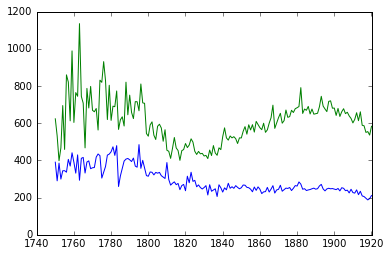

In [2]:
series = wpm0.series('art')
plt.plot(*zip(*series.items()))

series = wpm1.series('art')
plt.plot(*zip(*series.items()))

0.9508296284 6.04591332671e-88


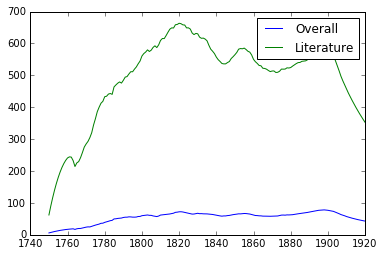

In [59]:
from collections import OrderedDict
from scipy.stats import pearsonr

def plot_token(token):

    s1 = wpm0.series_smooth(token)
    plt.plot(*zip(*s1.items()), label='Overall')

    s2 = wpm1.series_smooth(token)
    plt.plot(*zip(*s2.items()), label='Literature')
    
    plt.legend(loc='upper right')
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    corr, p = pearsonr(vals1, vals2)
    print(corr, p)
    
plot_token('literary')

In [48]:
corrs = OrderedDict()
for i, token in enumerate(wpm1.tokens(150)):
    
    s1 = wpm0.series_smooth(token)
    s2 = wpm1.series_smooth(token)
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    corr, p = pearsonr(vals1, vals2)
    
    if p < 0.01:
        corrs[token] = (corr, p)


In [47]:
corrs = OrderedDict(sorted(
    corrs.items(),
    key=lambda x: x[1][0],
))

for t, (c, p) in list(corrs.items())[:500]:
    print(t, c, p)

improvements -0.75090084092 2.87664171918e-32
charm -0.705767786809 6.14738616228e-27
liable -0.704087580234 6.47943850922e-27
jew -0.700673202761 1.44880548418e-26
emerging -0.686001656227 1.91030592641e-23
palm -0.673227414728 2.13719121264e-23
improved -0.660320786057 8.82929338548e-23
enforce -0.654266184353 5.12039795616e-22
insert -0.641589590513 3.2475703146e-21
pointing -0.635885563315 9.26903463865e-21
insisted -0.635170824562 1.37048711114e-20
heal -0.621078563982 1.50417698651e-18
frame -0.614844452504 3.6966164305e-19
gross -0.59945802273 4.62001379406e-18
specimen -0.599005855068 4.96580124002e-18
pension -0.593342974811 1.88539529808e-17
solid -0.584995503952 4.39824351809e-17
adventure -0.583034061304 7.30714311284e-17
inheritance -0.582952017032 1.12713629659e-16
entirely -0.576925933624 1.47408870921e-16
revolt -0.56852611904 1.1074402677e-15
court -0.566878513711 6.34836834671e-16
applied -0.549151347865 7.42156750662e-15
ps -0.547047041271 1.41273420628e-14
estate -0